In [16]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

## Read Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X_train = train.drop('Churn', axis = 1)
X_test = test.drop('Churn', axis = 1)
y_train = train['Churn']
y_test = test['Churn']
print(train.shape)
print(test.shape)

(7760, 29)
(1761, 29)


In [3]:
X_train.columns

Index(['tenure', 'MonthlyCharges', 'ExtraCharges', 'SeniorCitizen_Yes',
       'Partner_Yes', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_OneLine', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### Problem of Interest

The problem at hand is to predict the potential churn of a user. That being said, predicting 'No' of a user who's leaving is going to be more costly. Since positive class is more important and false negative is more costly, the metric I'll use here is F2 score.

## Models

The models we'll use here are:
- Decision Tree (Entropy/Gini)
- Logistic Regression
- Random Forest
- SVM
- KNN
- Extreme Gradient Boosting

### Entropy model

In [3]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion='entropy', random_state = 246, max_depth = 3)

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_entr = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred_entr)

print("Model Entropy - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_entr))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_entr))
print('Precision score:', metrics.precision_score(y_test,y_pred_entr, pos_label = "Yes"))
print('Recall score:', metrics.recall_score(y_test,y_pred_entr, pos_label = "Yes"))
print('F2 Measure:', metrics.fbeta_score(y_test, y_pred_entr, beta = 2, pos_label = 'Yes'))

Model Entropy - max depth 3
Accuracy: 0.6536059057353776
Balanced accuracy: 0.721188056223916
Precision score: 0.42481598317560465
Recall score: 0.8650963597430407
F2 Measure: 0.716566158212132


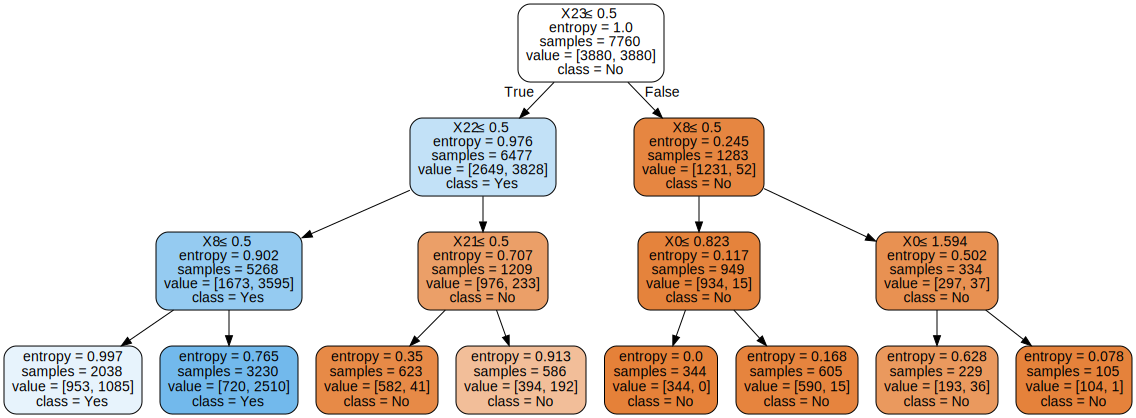

In [4]:
import graphviz 

dot_data = tree.export_graphviz(entr_model, out_file=None,  
                     class_names=entr_model.classes_,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Gini Impurity

In [12]:
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state = 24, max_depth = 3)

# Call fit() on entr_model
gini_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred_gini = gini_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred_gini)

print("Model gini")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_gini))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_gini))
print('Precision score:', metrics.precision_score(y_test,y_pred_gini, pos_label = "Yes"))
print('Recall score:', metrics.recall_score(y_test,y_pred_gini, pos_label = "Yes"))
print('F2 Measure:', metrics.fbeta_score(y_test, y_pred_gini, beta = 2, pos_label = 'Yes'))

Model gini
Accuracy: 0.6536059057353776
Balanced accuracy: 0.721188056223916
Precision score: 0.42481598317560465
Recall score: 0.8650963597430407
F2 Measure: 0.716566158212132


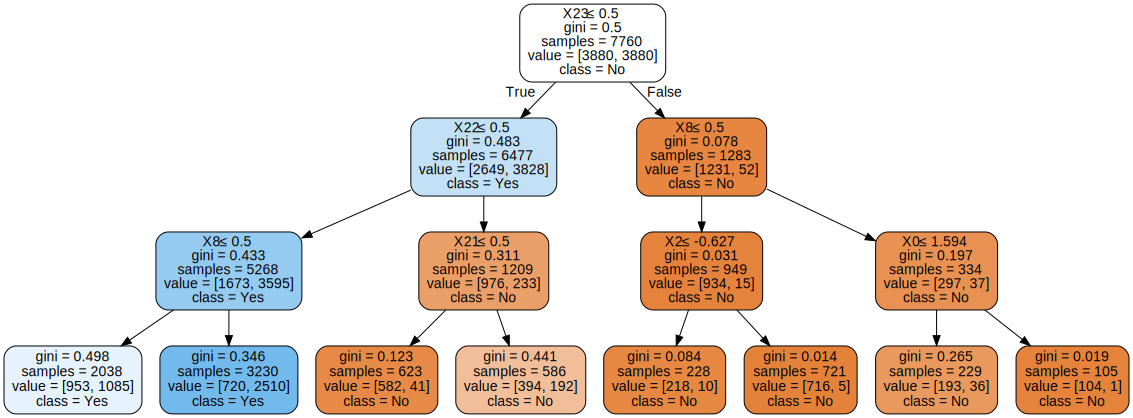

In [13]:
dot_data = tree.export_graphviz(gini_model, out_file=None,  
                     class_names=entr_model.classes_,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create F2 score

ftwo_score = metrics.make_scorer(metrics.fbeta_score, beta=2, pos_label = 'Yes')

Cs = [0.001, 0.1, 1, 10, 100]
param_grid = {'C': Cs}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg, param_grid, scoring= ftwo_score, cv = 5)
logreg_cv.fit(X_train, y_train)
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
y_pred_logreg = logreg_cv.predict(X_test)

print("Logistic Regression")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_logreg))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_logreg))
print('Precision score:', metrics.precision_score(y_test,y_pred_logreg, pos_label = "Yes"))
print('Recall score:', metrics.recall_score(y_test,y_pred_logreg, pos_label = "Yes"))
print('F2 Measure:', metrics.fbeta_score(y_test, y_pred_logreg, beta = 2, pos_label = 'Yes'))

Tuned Logistic Regression Parameters: {'C': 1}
Logistic Regression
Accuracy: 0.7552526973310619
Balanced accuracy: 0.7417706164839202
Precision score: 0.5285714285714286
Recall score: 0.7130620985010707
F2 Measure: 0.666533226581265


### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
param_grid = {'n_estimators': n_estimators,
              'criterion' : ['gini', 'entropy'],
              'max_depth' : [10, 30, 50],
              'min_samples_leaf': [3, 10],
              'min_samples_split': [5, 12]}

ftwo_score = metrics.make_scorer(metrics.fbeta_score, beta=2, pos_label = 'Yes')
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid, scoring = ftwo_score, cv = 5)

rf_cv.fit(X_train, y_train)
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_)) 
y_pred_rf = rf_cv.predict(X_test)

print("Random Forest")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_rf))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_rf))
print('Precision score:', metrics.precision_score(y_test,y_pred_rf, pos_label = "Yes"))
print('Recall score:', metrics.recall_score(y_test,y_pred_rf, pos_label = "Yes"))
print('F2 Measure:', metrics.fbeta_score(y_test, y_pred_rf, beta = 2, pos_label = 'Yes'))

Tuned Random Forest Parameters: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 800}
Random Forest
Accuracy: 0.7660420215786485
Balanced accuracy: 0.7388482172702873
Precision score: 0.5473321858864028
Recall score: 0.6809421841541756
F2 Measure: 0.6492445896284197


28


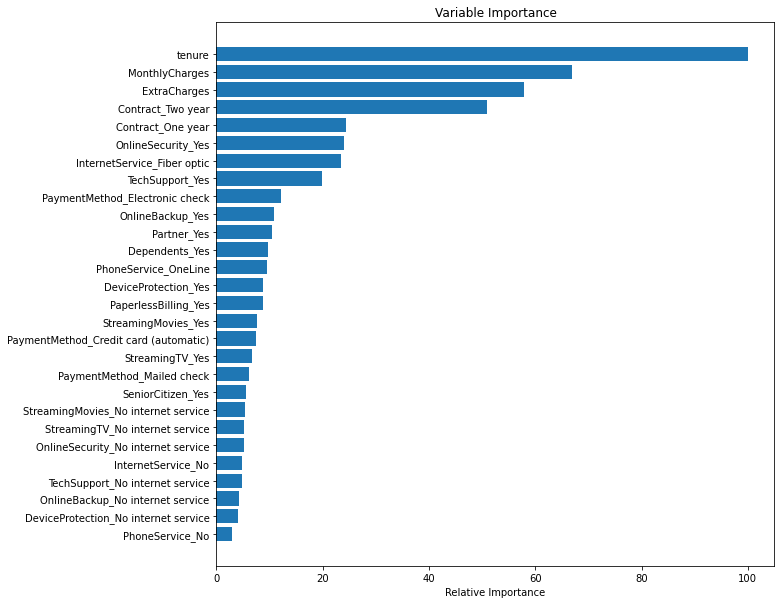

In [17]:
feature_importance = rf_cv.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### SVM

In [20]:
from sklearn import svm

param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

clf = svm.SVC()
svm_cv = GridSearchCV(clf, param_grid, scoring = ftwo_score, cv = 10)

svm_cv.fit(X_train, y_train)
print("Tuned SVM Parameters: {}".format(svm_cv.best_params_)) 
y_pred_svm = svm_cv.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred_svm))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_svm))
print('Precision score:', metrics.precision_score(y_test,y_pred_svm, pos_label = "Yes"))
print('Recall score:', metrics.recall_score(y_test,y_pred_svm, pos_label = "Yes"))
print('F2 Measure:', metrics.fbeta_score(y_test, y_pred_svm, beta = 2, pos_label = 'Yes'))

Tuned SVM Parameters: {'C': 0.001, 'kernel': 'sigmoid'}
Accuracy: 0.6513344690516751
Balanced accuracy: 0.7299064368904083
Precision score: 0.42538071065989846
Recall score: 0.8972162740899358
F2 Measure: 0.7343147563967753


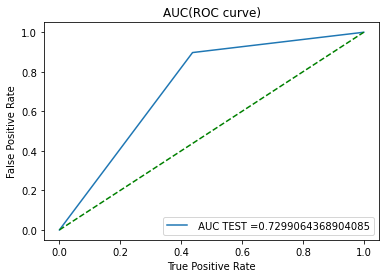

In [22]:
from sklearn.metrics import roc_curve, auc

y_test_svm = [1 if x == 'Yes' else 0 for x in y_test]
y_pred_svm_2 = [1 if x == 'Yes' else 0 for x in y_pred_svm]
test_fpr, test_tpr, te_thresholds = roc_curve(y_test_svm, y_pred_svm_2)

plt.grid()

plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()


### KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(3, 15, 2),
              'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, scoring = ftwo_score, cv = 5)

knn_cv.fit(X_train, y_train)
print("Tuned Random Forest Parameters: {}".format(knn_cv.best_params_)) 
y_pred_knn = knn_cv.predict(X_test)

print("KNN")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred_knn))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred_knn))
print('Precision score:', metrics.precision_score(y_test,y_pred_knn, pos_label = "Yes"))
print('Recall score:', metrics.recall_score(y_test,y_pred_knn, pos_label = "Yes"))
print('F2 Measure:', metrics.fbeta_score(y_test, y_pred_knn, beta = 2, pos_label = 'Yes'))

Tuned Random Forest Parameters: {'n_neighbors': 3, 'weights': 'uniform'}
KNN
Accuracy: 0.7035775127768313
Balanced accuracy: 0.6929230280424559
Precision score: 0.45961820851688695
Recall score: 0.6702355460385439
F2 Measure: 0.613966261278933


### XGBoost

In [19]:
y_train_xgb = [1 if x == 'Yes' else 0 for x in y_train]
y_test_xgb = [1 if x == 'Yes' else 0 for x in y_test]

In [24]:
from xgboost import XGBClassifier

weights = [1, 10, 25, 50, 75, 99, 100, 1000]
param_grid = {'scale_pos_weight': weights}

xgb = XGBClassifier(use_label_encoder=False)
xgb_cv = GridSearchCV(xgb, param_grid, cv = 5)

xgb_cv.fit(X_train, y_train_xgb)
print("Tuned Extreme Gradient boosting Parameters: {}".format(xgb_cv.best_params_)) 
y_pred_xgb = xgb_cv.predict(X_test)

print("XGB")
print("Accuracy:", metrics.accuracy_score(y_test_xgb,y_pred_xgb))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test_xgb,y_pred_xgb))
print('Precision score:', metrics.precision_score(y_test_xgb,y_pred_xgb))
print('Recall score:', metrics.recall_score(y_test_xgb,y_pred_xgb))
print('F2 Measure:', metrics.fbeta_score(y_test_xgb, y_pred_xgb, beta = 2))

[22:30:46] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:48] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:49] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:50] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:51] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:53] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:54] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:55] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:57] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:58] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:30:59] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:00] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:02] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:03] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:04] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:05] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:06] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:07] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[22:31:08] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned Extreme Gradient boosting Parameters: {'scale_pos_weight': 1}
XGB
Accuracy: 0.7666098807495741
Balanced accuracy: 0.7262335801210661
Precision score: 0.551660516605166
Recall score: 0.6402569593147751
F2 Measure: 0.6203319502074688


C:\Users\bruce\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


## Comparison 

Just looking at the F2 score, we see that SVM has the highst score of 0.73, followed by Entropy Decision Tree with a score of 0.71.

| Models | F2 Score | Accuracy | Precision | Recall |
| :- | :-: | :-: | :-: | -: |
| Decision Tree | 0.717 | 0.654 | 0.425 | 0.865
| Logistic Regression | 0.667 | 0.755 | 0.529 | 0.713 |
| Random Forest | 0.65 | 0.766 | 0.547 | 0.681 |
| KNN | 0.704 | 0.614 | 0.46 | 0.67 |
| XGBoost | 0.62 | 0.767 | 0.552 | 0.64 | 
| SVM| 0.734 | 0.651 | 0.425 | 0.897 | 